# K-Nearest Neighbours (KNN)

KNN is one of the most simple supervised algorithms in machine learning that can be used for both classification and regression. Suppose we have a set of points $(x_1, y_1), (x_2, y_2), ...$ and for this we select the iris dataset https://scikit-learn.org/1.4/auto_examples/datasets/plot_iris_dataset.html. In our case, $x_i$ denotes the petal lengths and $y_i$ its width for the $i$-th sample.

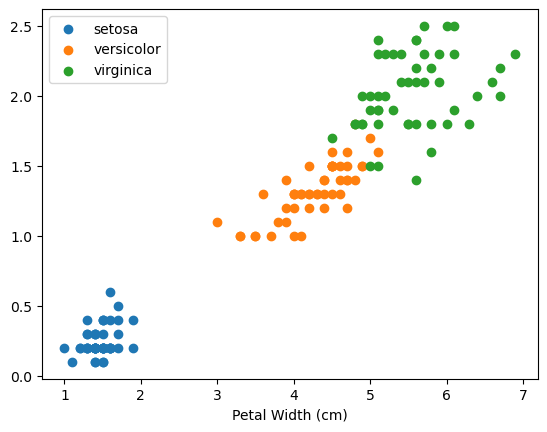

In [79]:
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

# Loading dataset,
iris_data = datasets.load_iris()

# Extracting data,
targets = iris_data["target"]
target_names = iris_data["target_names"]
x_coords = iris_data["data"].T[2]
y_coords = iris_data["data"].T[3]

# Plotting,
for i, class_name in enumerate(target_names):
    plt.scatter(
        x_coords[targets == i],
        y_coords[targets == i],
        label=class_name
    )

plt.xlabel("Petal Length (cm)")
plt.xlabel("Petal Width (cm)")
plt.legend()
plt.show()

Below we have a basic implementation of the KNN algorithm.


In [81]:
def distance_metric(new_point, data_points, metric="euclid"):

    # Computing euclidean distance,
    if metric == "euclid":
        SSD = np.sum((data_points-new_point)**2, axis=1)
        dists = np.sqrt(SSD)

    return dists

def KNN(new_point, data_points, targets, k, metric="euclid"):
    """Basic implementation of the KNN algorithm for unsupervised classification."""

    # Computing distances,
    distances = distance_metric(new_point, data_points, metric=metric)

    # Extracting k nearest neighbours,
    nearest_neighbours_idx = np.argsort(distances)[:k]
    nearest_neighbours_class = targets[nearest_neighbours_idx]

    # Taking the majority vote,
    pred = stats.mode(nearest_neighbours_class)[0]

    return pred

# Creating data points,
data_points = np.array([x_coords, y_coords]).T

# Calculation prediction,
pred = KNN(new_point=[4, 1.5], data_points=data_points, targets=targets, k=5)
print(pred)

1
